In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA
import sklearn as skl

# For loading huggingface stuff
from sentence_transformers import SentenceTransformer

# Feature Extraction

In [18]:
# Possible values: labse, bert, word2vec
FEATURE_EXTRACTOR = "labse" 

In [19]:
# Load the dataset from the corresponding csv

DATASET_PATHS = ["training", "validation", "test"]


In [20]:
# Load the feature extractor specified in embedding generator
feature_extractor = None 

if FEATURE_EXTRACTOR == "labse":
    # LaBSE found here: https://huggingface.co/sentence-transformers/LaBSE
    feature_extractor = SentenceTransformer('sentence-transformers/LaBSE')
else: 
    pass 

In [21]:
for db_path in DATASET_PATHS:
    loaded_df = pd.read_csv(db_path + ".csv")

    # Prepare sentence list
    sentences = loaded_df["text"]

    # Apply the feature extractor to a target dataset

    encodings = []

    if FEATURE_EXTRACTOR == "labse":
        encodings = feature_extractor.encode(sentences)
    else: 
        pass

    # Store individual floats in the vector in their own columns.

    transposed = encodings.T
    new_df = loaded_df.copy(deep=True)

    for i in range(0, len(encodings[0])):
        new_df['_e' + str(i)] = transposed[i]

    # Save the feature list to a new dataset
    NEW_FILE_PATH = db_path + "_" + FEATURE_EXTRACTOR
    new_df.to_csv(NEW_FILE_PATH + ".csv", index=False)

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_27884\821129340.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df['_e' + str(i)] = transposed[i]
C:\Users\Joaquin\AppData\Local\Temp\ipykernel_27884\821129340.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df['_e' + str(i)] = transposed[i]
C:\Users\Joaquin\AppData\Local\Temp\ipykernel_27884\821129340.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

# Dimensionality Reduction

In [82]:
# Load all data and merge into one df

FEATURE_EXTRACTED_DATASET = [x + "_" + FEATURE_EXTRACTOR for x in DATASET_PATHS]
DATASET_LENGTHS = []

merged_df = None

for db_path in FEATURE_EXTRACTED_DATASET:
    loaded_df = pd.read_csv(db_path + ".csv")
    DATASET_LENGTHS.append(len(loaded_df))
    
    if merged_df is None:
        merged_df = loaded_df
    else:
        merged_df = pd.concat([merged_df, pd.DataFrame.from_records(loaded_df)])

len(merged_df)


20000

In [83]:
# Extract only the feature columns
FEATURE_COLUMNS = [x for x in merged_df if x.startswith("_e")]
design_matrix = merged_df[FEATURE_COLUMNS]
design_matrix.head()

,_e0,_e1,_e2,_e3,_e4,_e5,_e6,_e7,_e8,_e9,...,_e758,_e759,_e760,_e761,_e762,_e763,_e764,_e765,_e766,_e767
0,-0.016433,0.038372,-0.072952,-0.049647,-0.067110,-0.005709,-0.060580,0.009639,-0.006571,-0.010965,...,-0.044769,0.003667,-0.062948,-0.029397,-0.067556,-0.021556,-0.022210,-0.027845,-0.042171,-0.012610
1,-0.025967,-0.025392,0.007919,-0.068362,-0.021875,0.031694,-0.041811,0.015030,-0.002453,-0.028101,...,0.025374,-0.035088,-0.034583,0.006004,-0.067565,-0.019569,-0.036958,-0.007310,-0.003865,-0.025950
2,0.023410,0.009553,-0.015229,-0.064111,0.031054,0.046769,-0.064055,0.030971,-0.034769,0.038459,...,-0.011751,-0.046564,-0.030093,0.006798,-0.025211,-0.023276,-0.007767,-0.052697,0.019756,0.011792
3,0.002347,0.029890,0.000119,-0.048394,-0.004900,0.037610,-0.058953,0.059808,-0.041701,0.023832,...,-0.063332,-0.011531,-0.051917,-0.030781,-0.004327,-0.043118,-0.041095,-0.013087,-0.066293,-0.018459
4,0.018289,-0.059630,-0.037752,-0.063976,-0.055854,0.016231,-0.050824,0.028145,0.002781,0.025041,...,-0.002654,-0.002768,-0.026407,0.048166,-0.044047,0.028759,-0.060008,-0.056353,-0.021699,-0.051354


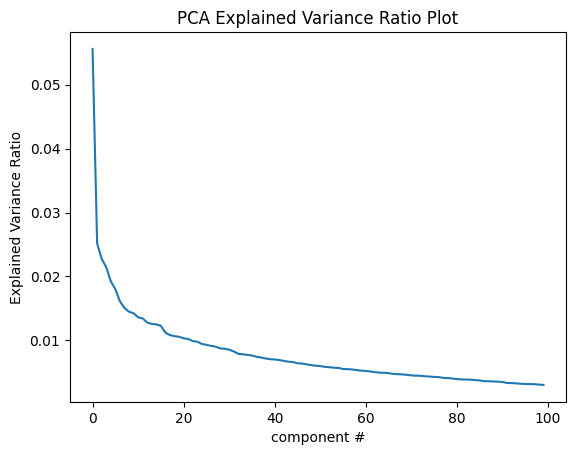

In [84]:
# Apply PCA to the design matrix
N_COMPONENTS = 100

# Configure PCA here
pca = PCA(n_components = 100)
pca.fit(design_matrix)

# Plot 
plt.title("PCA Explained Variance Ratio Plot")
plt.xlabel("component #")
plt.ylabel("Explained Variance Ratio")
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [85]:
# Apply to the design matrix
dimensionality_reduced = pca.fit_transform(design_matrix)

In [86]:
# Apply to the original dataframe
dimensionality_reduced_transposed = dimensionality_reduced.T
for x in range(N_COMPONENTS):
    merged_df["c_" + str(x)] = dimensionality_reduced_transposed[x]

# Remove unnecessary columns

merged_df.drop(columns=FEATURE_COLUMNS, inplace = True)

merged_df.head()

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_27884\3936933023.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df["c_" + str(x)] = dimensionality_reduced_transposed[x]
C:\Users\Joaquin\AppData\Local\Temp\ipykernel_27884\3936933023.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df["c_" + str(x)] = dimensionality_reduced_transposed[x]
C:\Users\Joaquin\AppData\Local\Temp\ipykernel_27884\3936933023.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

,text,label,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,...,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
0,im feeling rather rotten so im not very ambiti...,0,-0.248376,-0.085579,0.115852,-0.194210,-0.142186,0.165681,0.110159,0.009981,...,0.000131,0.000739,0.052252,-0.005762,0.013107,0.015534,0.043769,-0.001707,-0.000197,0.017519
1,im updating my blog because i feel shitty,0,-0.140910,0.039217,0.069109,-0.082725,-0.122064,-0.001957,0.042073,-0.024839,...,0.064628,-0.020597,-0.014847,0.042921,-0.010814,-0.001452,-0.010710,0.025279,-0.069695,-0.013521
2,i never make her separate from me because i do...,0,0.070646,0.135864,0.306759,-0.148900,0.135748,0.131178,0.139612,-0.148768,...,0.086306,0.012482,-0.016285,0.024648,0.018562,0.047871,0.028912,0.028311,0.052342,0.007939
3,i left with my bouquet of red and yellow tulip...,1,0.125882,-0.096791,-0.052366,0.095561,-0.098454,0.055928,-0.103075,-0.074209,...,0.069597,0.025331,-0.110761,0.060858,-0.012814,-0.002811,0.017718,0.070250,-0.027845,0.092293
4,i was feeling a little vain when i did this one,0,-0.273006,-0.066182,-0.082699,-0.156197,-0.100664,0.051345,0.086543,0.047319,...,-0.037382,0.025907,0.000956,0.014848,0.016610,-0.002194,0.016316,0.031993,0.019357,-0.052353


In [87]:
# Then re-create the respective files
idx = 0
for i, db_path in enumerate(FEATURE_EXTRACTED_DATASET):
    written_df = merged_df.iloc[:DATASET_LENGTHS[i] + idx]

    written_df.to_csv(db_path + "_reduced" + ".csv")

    idx += DATASET_LENGTHS[i]
